In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import data_reader_writer

import pypsa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 22})

# Curtailment in Scotland - 2035

In [3]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2035
year_baseline = 2012

start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:00:00'
# time step as fraction of hour
time_step = 1
data_reader_writer.data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
                               scenario=scenario, FES=2022, merge_generators=True, scale_to_peak=True,
                               networkmodel='Reduced', P2G=True)

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:208: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


In [4]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data')

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 1], imported network file PyPSA version None.

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data has buses, generators, lines, links, loads, storage_units


In [5]:
# scale the B6 lines to system transformation economy RT
B6 = network.lines.at['17', 's_nom'] + network.lines.at['18', 's_nom'] + network.lines.at['23', 's_nom'] + network.lines.at['24', 's_nom'] + network.lines.at['16', 's_nom']
# network.lines
scaling_factor = 29682 / B6
network.lines.s_nom *= scaling_factor
network.lines

,bus0,bus1,r,x,b,s_nom,type,g,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
0,Beauly,Peterhead,0.01220,0.02000,0.0856,1242.667464,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beauly,Errochty,0.00700,0.15000,0.0520,312.442105,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Beauly,Peterhead,0.01220,0.02000,0.2844,1242.667464,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Beauly,Errochty,0.00700,0.15000,0.0520,312.442105,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Peterhead,Denny/Bonnybridge,0.00040,0.06500,0.4454,1798.909091,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Sellindge,Kemsley,0.00020,0.00503,0.1797,7337.655502,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,Lovedean,Sellindge,0.00038,0.00711,0.2998,7266.645933,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Lovedean,Sellindge,0.00038,0.00711,0.2998,7266.645933,,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 81.16s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-19
Read LP format model from file C:\Users\alyden\AppData\Local\Temp\pypsa-problem-wah62n_b.lp
Reading time = 58.80 seconds
obj: 25438176 rows, 7927801 columns, 44682912 nonzeros
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 25438176 rows, 7927801 columns and 44682912 nonzeros
Model fingerprint: 0x6a9a6b18
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [1e+00, 1e+09]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-06, 2e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 23379588 rows and 61321 columns (presolve time = 6s) ...
Presolve removed 23379588 rows and 804623 columns (presolve time = 10s) ...

INFO:pypsa.linopf:Optimization successful. Objective value: 1.42e+09


('ok', 'optimal')

In [7]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})

p_by_carrier

carrier,Biomass (co-firing),Biomass (dedicated),CCS Biomass,CCS Gas,Coal,Hydrogen,Hydro,Natural Gas,Nuclear,Oil,...,Waste,Wave power,Wind Offshore,Wind Onshore,Battery,Compressed Air,Liquid Air,P2G,Pumped Storage Hydroelectric,Biomass
snapshot,,,,,,,,,,,,,,,,,,,,,
2035-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,313.949004,0.0,0.0,0.0,...,0.0,8.20800,45271.464223,10300.540434,0.0,0.0,0.0,0.0,0.000000,0.0
2035-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,294.685515,0.0,0.0,0.0,...,0.0,8.20800,35598.458946,14131.493943,0.0,0.0,0.0,0.0,0.000000,0.0
2035-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,294.456188,0.0,0.0,0.0,...,0.0,8.20800,39595.019308,13669.017360,0.0,0.0,0.0,0.0,0.000000,0.0
2035-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,331.677119,0.0,0.0,0.0,...,0.0,0.00000,39277.997898,12242.626722,0.0,0.0,0.0,0.0,0.000000,0.0
2035-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,434.345810,0.0,0.0,0.0,...,0.0,9.67746,39569.582209,15632.838800,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,557.035888,0.0,0.0,0.0,...,0.0,5.16800,58483.059856,12886.699058,0.0,0.0,0.0,0.0,0.000000,0.0
2035-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,524.700746,0.0,0.0,0.0,...,0.0,3.97746,58265.223651,14163.430996,0.0,0.0,0.0,0.0,0.000000,0.0
2035-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,471.726151,0.0,0.0,0.0,...,0.0,3.97746,54287.795006,13664.459081,0.0,0.0,0.0,0.0,274.259684,0.0


Text(0.5, 0, '')

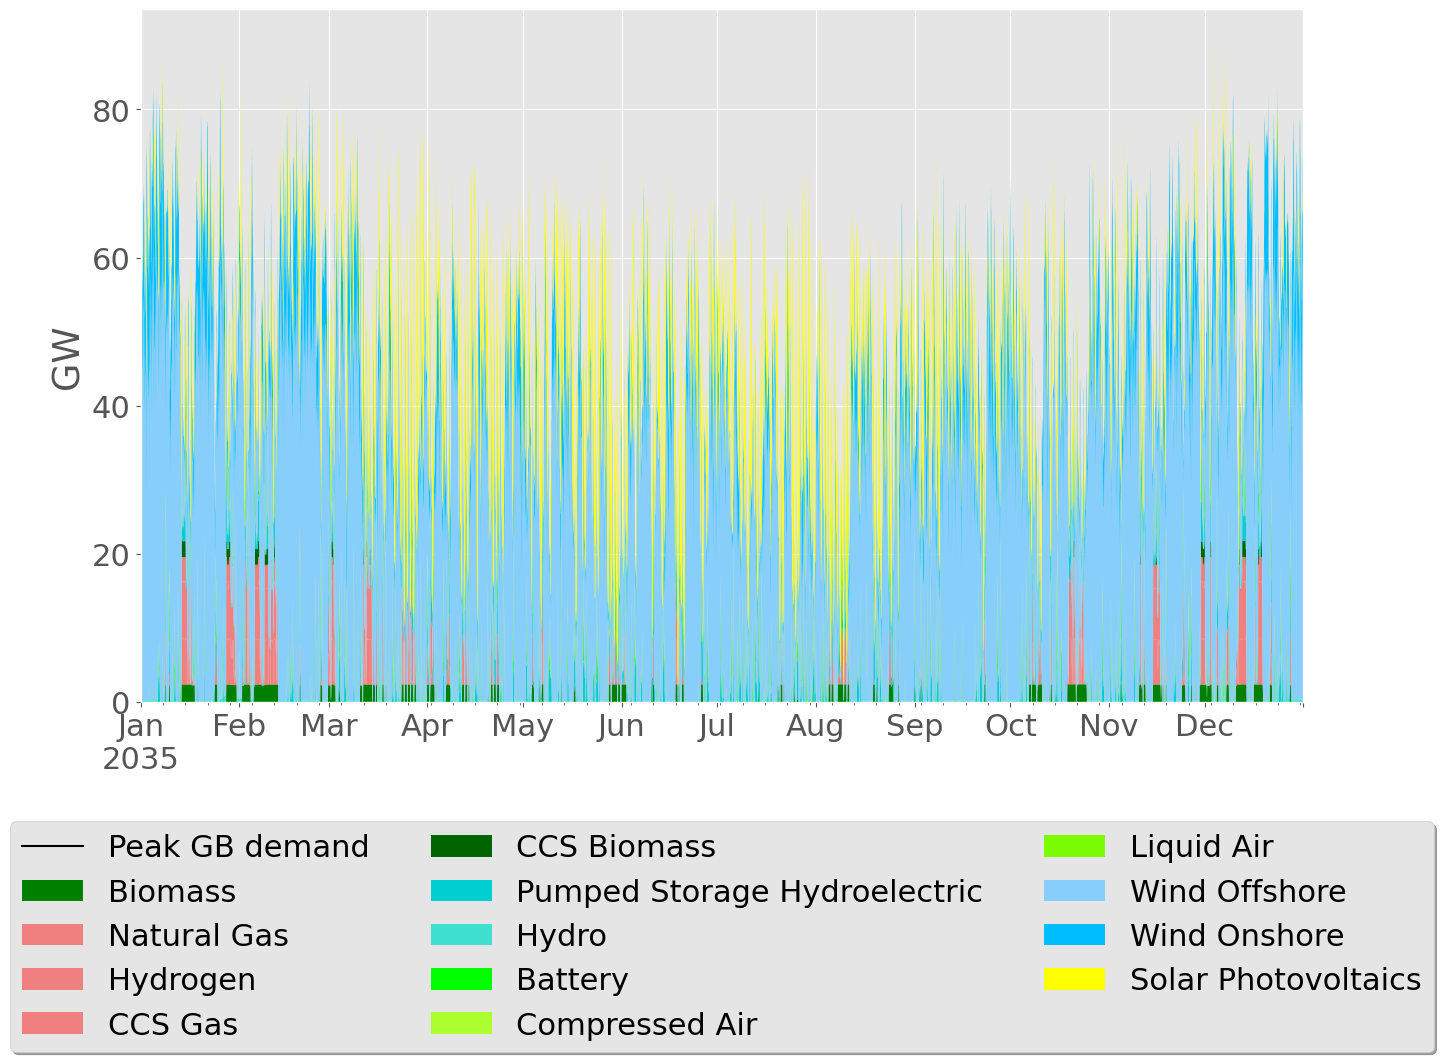

In [8]:
cols = ['Biomass', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)


colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "lightcoral",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.axvline(x = '2045-12-07 20:00:00', color = 'black', label = 'Peak GB demand')
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)

ax.set_ylabel("GW")

ax.set_xlabel("")

In [9]:

buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
df_generators_scotland = network.generators[network.generators.bus.isin(buses_scotland)]
df_storage_scotland = network.storage_units[network.storage_units.bus.isin(buses_scotland)]

p_by_carrier_scotland = network.generators_t.p[df_generators_scotland.index.values].groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier_scotland = network.storage_units_t.p[df_storage_scotland.index.values].groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier_scotland[storage_by_carrier_scotland < 0] = 0

p_by_carrier_scotland = pd.concat([p_by_carrier_scotland, storage_by_carrier_scotland], axis=1)

In [10]:
network.lines_t.p0[['17', '18', '23', '24', '16']]
B6_to_scotland = network.lines_t.p0[['17', '18', '23', '24', '16']]

B6_import = B6_to_scotland.copy()
B6_export = B6_to_scotland.copy()

B6_import[B6_import > 0] = 0
B6_import = B6_import.sum(axis=1) * -1

B6_export[B6_export < 0] = 0
B6_export = B6_export.sum(axis=1) * -1
B6_export.name = 'B6 export'

snapshot
2035-01-01 00:00:00   -2992.790722
2035-01-01 01:00:00   -8459.870644
2035-01-01 02:00:00   -3579.928804
2035-01-01 03:00:00   -8835.561273
2035-01-01 04:00:00   -4791.714613
                          ...     
2035-12-31 19:00:00   -7154.543807
2035-12-31 20:00:00   -6512.446521
2035-12-31 21:00:00   -7674.560188
2035-12-31 22:00:00   -8584.318128
2035-12-31 23:00:00   -7797.384563
Name: B6 export, Length: 8760, dtype: float64


c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\plotting\_matplotlib\core.py:1391: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(None, 0)


Text(0.5, 0, '')

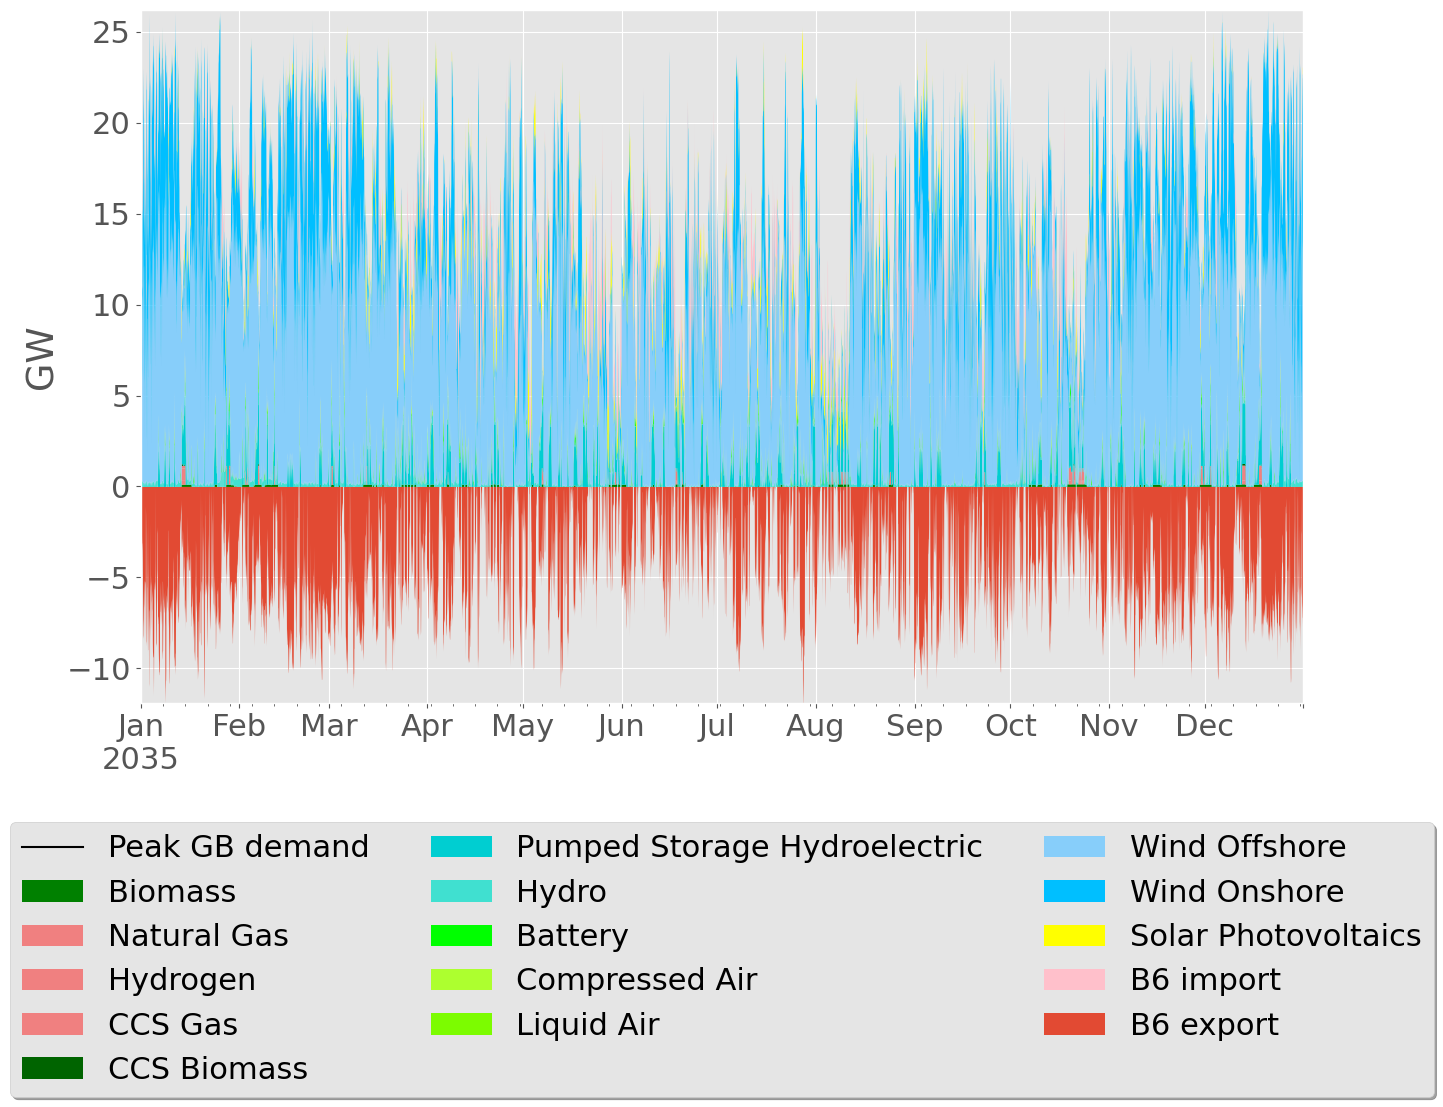

In [11]:
# group biomass stuff
p_by_carrier_scotland['Biomass'] = (
    p_by_carrier_scotland['Biomass (dedicated)'])

# add B6 flows
p_by_carrier_scotland['B6 import'] = B6_import

# rename the hydro bit
p_by_carrier_scotland = p_by_carrier_scotland.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier_scotland = p_by_carrier_scotland.rename(
    columns={'Interconnector': 'Interconnectors Import'})

cols = ['Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Unmet Load', 'B6 import'
        ]

p_by_carrier_scotland = p_by_carrier_scotland[cols]

p_by_carrier_scotland.drop(
    (p_by_carrier_scotland.max()[p_by_carrier_scotland.max() < 50.0]).index,
    axis=1, inplace=True)


colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "lightcoral",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier_scotland / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier_scotland.columns])

# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
(B6_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# rescale the y axis
print(B6_export)
ax.set_ylim(B6_export.min() / 1e3, (p_by_carrier_scotland / 1e3).sum(axis=1).max())

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.axvline(x = '2045-12-07 20:00:00', color = 'black', label = 'Peak GB demand')
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
ax.set_ylabel("GW")

ax.set_xlabel("")


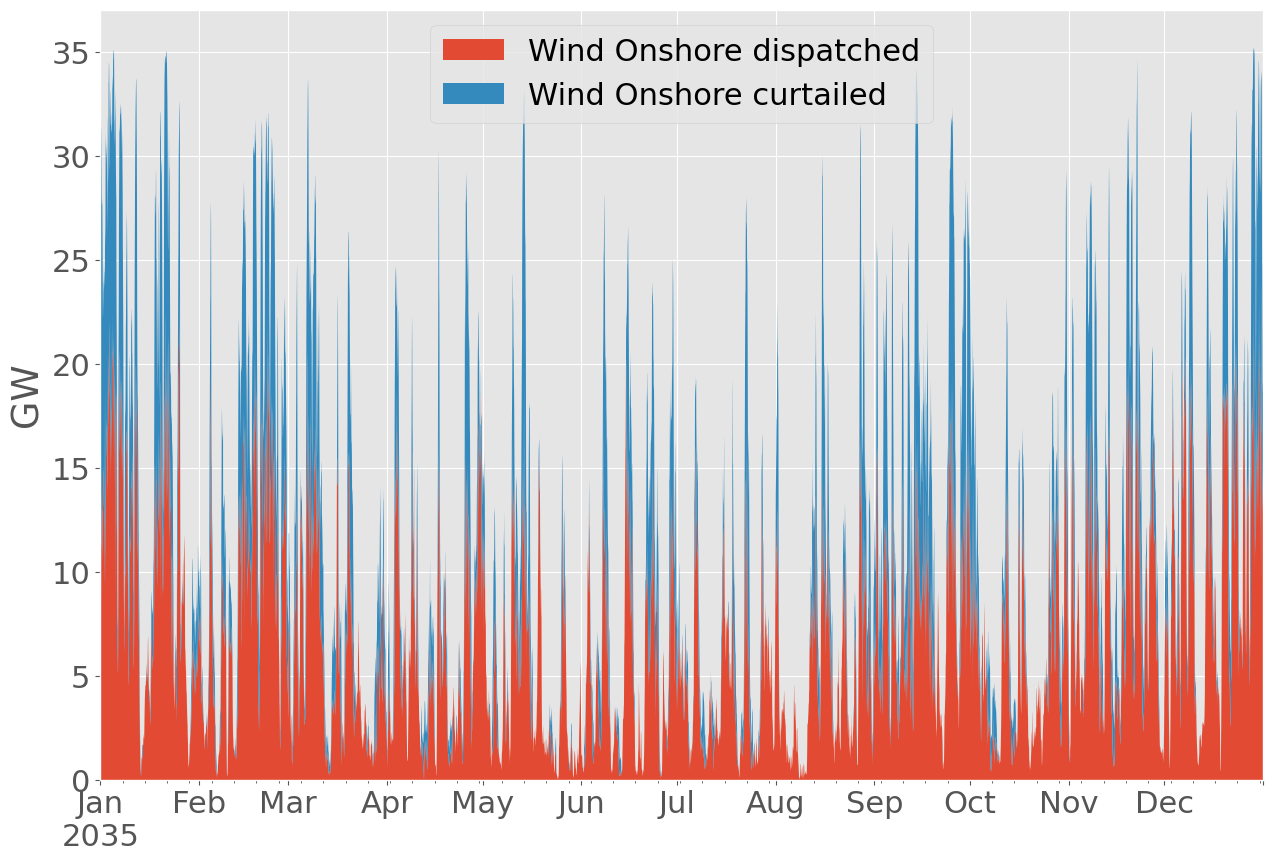

In [19]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]}) / 1000

# p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("GW")
ax.legend()

0.6208862229350169
16.258179284695203


<AxesSubplot:xlabel='snapshot'>

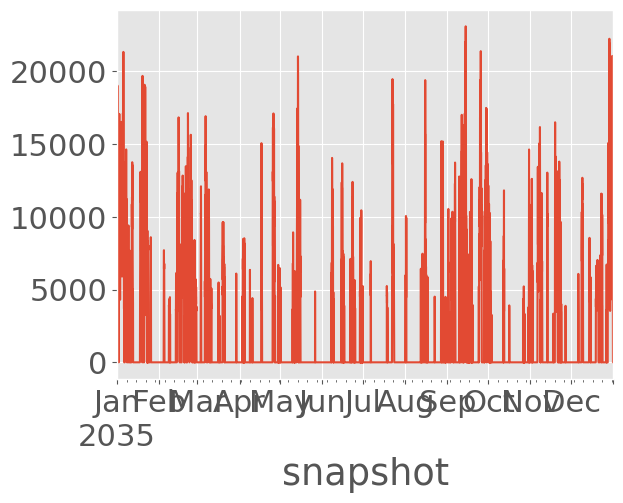

In [13]:
p_curtailed_by_carrier[carrier].sum() / 1000000
scaling_factor = 20.83 / (p_curtailed_by_carrier[carrier].sum() / 1000000)
print(scaling_factor)
curtailed_reduced = p_curtailed_by_carrier[carrier].copy()
factor = 3150
curtailed_reduced -= factor
curtailed_reduced[curtailed_reduced < factor] = 0
print(curtailed_reduced.sum() / 1000000)
curtailed_reduced.plot()

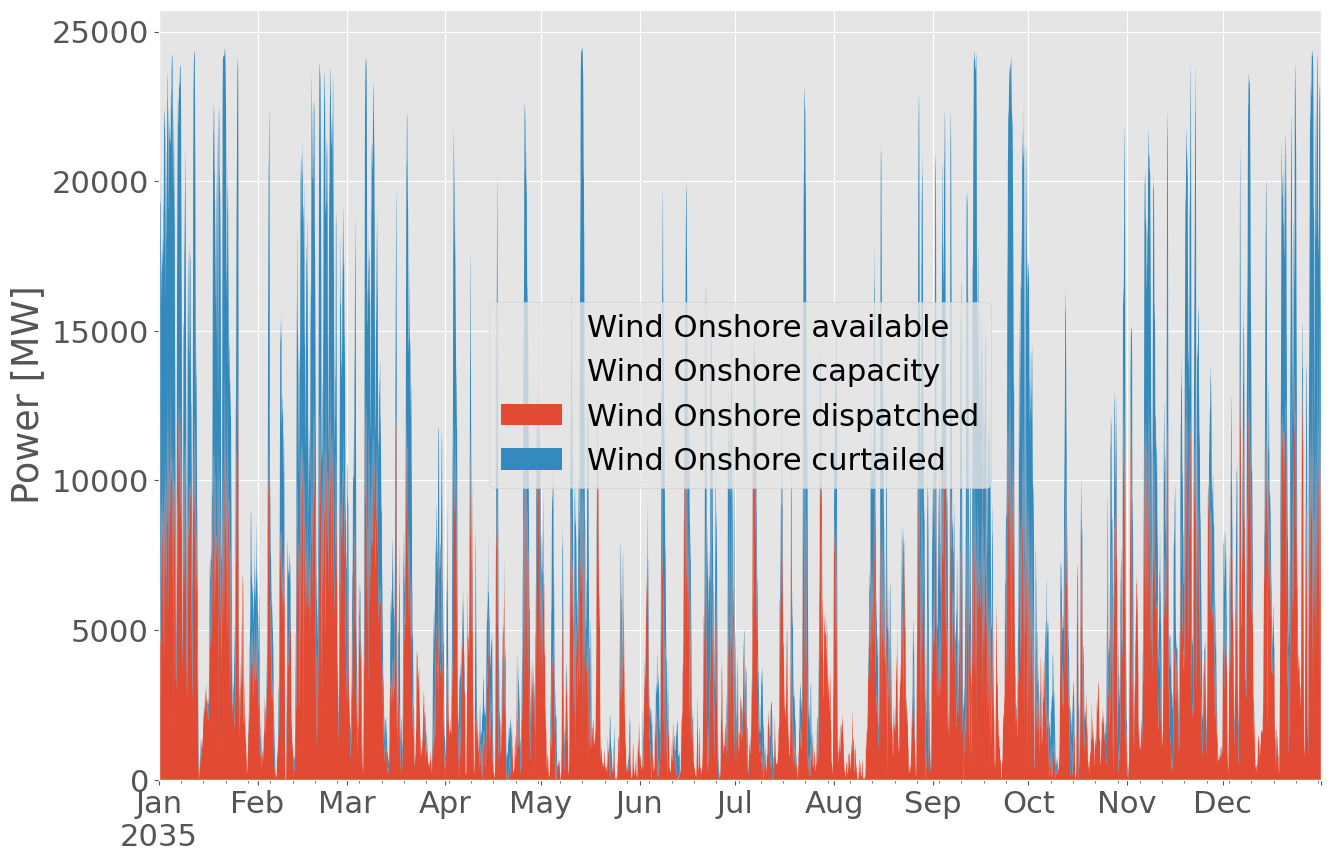

In [14]:
carrier = "Wind Onshore"

capacity = network.generators[network.generators.bus.isin(buses_scotland)].groupby("carrier").sum().at[carrier, "p_nom"]
generators_scotland = network.generators[network.generators.bus.isin(buses_scotland)]
generators_carrier_scotland = generators_scotland[generators_scotland.carrier.isin([carrier])]
p_max_pu_scotland = network.generators_t.p_max_pu[generators_carrier_scotland.index]

p_available_scotland = p_max_pu_scotland.multiply(generators_carrier_scotland["p_nom"])
p_available_by_carrier_scotland = p_available_scotland.groupby(network.generators[network.generators.bus.isin(buses_scotland)].carrier, axis=1).sum()

p_curtailed_by_carrier_scotland = p_available_by_carrier_scotland - p_by_carrier_scotland

p_df = pd.DataFrame({carrier + " available": p_available_by_carrier_scotland[carrier],
                     carrier + " dispatched": p_by_carrier_scotland[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier_scotland[carrier]})

p_df[carrier + " capacity"] = capacity
p_df[carrier + " curtailed"][p_df[carrier + " curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
# p_df[[carrier + " dispatched", carrier + " curtailed"]].iloc[0:100].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].iloc[0:100].plot(ax=ax, linewidth=0)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

33548819.784619544
29409372.86134849
4.139446923271053
Curtailed scotland:  16.690553076728946
12.883626028682272


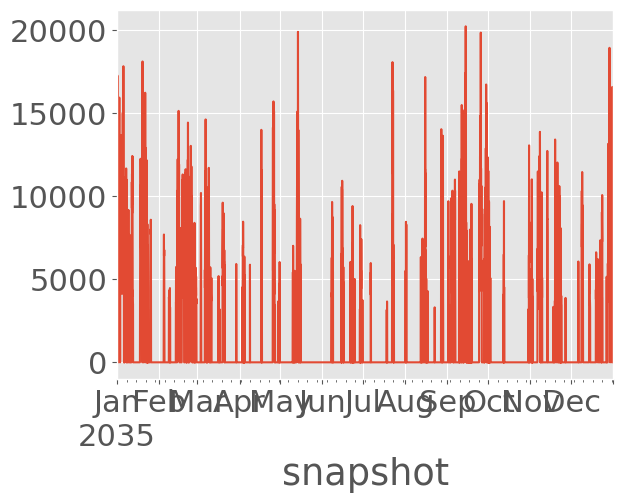

In [15]:
print(p_curtailed_by_carrier[carrier].sum())
print(p_curtailed_by_carrier_scotland[carrier].sum())
print((p_curtailed_by_carrier[carrier].sum() - p_curtailed_by_carrier_scotland[carrier].sum()) / 1000000)
print('Curtailed scotland: ', 20.83 - (p_curtailed_by_carrier[carrier].sum() - p_curtailed_by_carrier_scotland[carrier].sum()) / 1000000)
curtailed_reduced = p_curtailed_by_carrier_scotland[carrier].copy()
factor = 3150
curtailed_reduced -= factor
curtailed_reduced[curtailed_reduced < factor] = 0
print(curtailed_reduced.sum() / 1000000)
curtailed_reduced.plot()
curtailed_reduced.to_csv('Onshore_Wind_Curtailment_Scotland_2035.csv')
# p_curtailed_by_carrier_scotland[carrier].sum() / 1000000
# p_curtailed_by_carrier_scotland[carrier]

In [16]:
p_df.sum()

Wind Onshore available     6.602191e+07
Wind Onshore dispatched    3.661254e+07
Wind Onshore curtailed     2.940937e+07
Wind Onshore capacity      2.172373e+08
dtype: float64